## 2nd level fMRI analysis for simple linear models (for SPM contrast files) in Python
By Willem Huijbers  
1. Setup folder with contrast images (path)
2. Convert hdr/img (3D) and turn into nii (4D)

In [120]:
import os
import glob
import pandas as pd
import numpy as np
import nibabel as nib
import scipy as stats
from statsmodels.formula.api import ols

#from nilearn import plotting
#import seaborn
%matplotlib inline

In [123]:
fp_behav = '/Users/huijbers/Dropbox/SideProjects/Project_with_Sander_cueMEM/cuedMEM/cuedMEM_SubjectLevelData.csv' 
data_behav = pd.read_csv(fp_behav)
#WH drop 15-QR, 33-ZK (no fMRI data)
data_behav = data_behav[data_behav.SubjID != '15-QR']  #fix this later in loop
data_behav = data_behav[data_behav.SubjID != '33-ZK']
mean_behav = data_behav.groupby('SubjID').mean()


#fp = os.getcwd()
fp = '/Users/huijbers/Dropbox/SideProjects/student_folder (for Ruben)/fMRI_with_python/'
CONTRAST = 'C_OLD_T_OLD_O_HI_gt_F'

os.chdir(fp + CONTRAST)
fn = glob.glob('*.img') #assumes matching header (hdr) files
nsubjects = len(fn) #n_subjects = 43

In [38]:
model = ols(formula='bias ~ cue + dprime ',data=data_behav).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   bias   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     32.03
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           1.99e-15
Time:                        16:15:02   Log-Likelihood:                -40.244
No. Observations:                 129   AIC:                             88.49
Df Residuals:                     125   BIC:                             99.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1308      0.083      1.580      0.1

In [42]:
type(model.tvalues)

pandas.core.series.Series

In [54]:
names

['Intercept', 'cue_T_old', 'cue_T_pas', 'dprime']

In [7]:
#WH put 3D HDR contrast in 4D array
img = nib.load(os.getcwd() + '/' + fn[0])
image_data = img.get_data()
a = list(image_data.shape)
a.append(1) #Need to add emtpy dimensions to append (4d)
image_data.shape = a

#WH loop trough and add matrixes into 4d array
for ii in range(1, len(fn)):  #len(fn)
    img = nib.load(os.getcwd() + '/' + fn[ii])
    temp = img.get_data()
    a = list(temp.shape)
    a.append(1)
    temp.shape = a
    image_data  = np.append(temp , image_data , axis = 3)   
    #print(image_data.shape)
    #print('done loading' + fn[ii])  

image_data.shape

(53, 63, 54, 43)

In [163]:
data = pd.concat([fMRI, mean_behav[predictors[0]].reset_index(),mean_behav[predictors[1]].reset_index()],axis=1)   
data


,fMRI,SubjID,dprime,SubjID,bias
0,0.760489,1-JA,0.526028,1-JA,-0.126080
1,0.856116,10-MP,0.810974,10-MP,0.380459
2,0.340818,11-IS,0.738407,11-IS,-0.346736
3,-0.371924,12-LJ,1.031384,12-LJ,-0.489494
4,0.722279,13-WW,1.129966,13-WW,-0.478061
5,0.087821,14-EV,0.772323,14-EV,-0.119752
6,0.088094,16-LB,0.827439,16-LB,-0.467815
7,1.606649,17-LD,0.399462,17-LD,-0.271503
8,0.048957,19-TH,1.041993,19-TH,-0.346423
9,0.011932,2-RR,0.861157,2-RR,-0.671779


In [164]:
## WH work in progress: needs to match on subjects and reset_index is inperfect solusion
## Also to do: loop across voxels in vector_fMRI

TARGET = 'C_OLD_T_OLD_O_HI_gt_F'  #fmri
vector_fMRI = np.reshape(image_data,(np.product(image_data.shape[0:3]),n_subjects),order='F')
FORMULA='dprime + bias'
predictors= FORMULA.replace('*','+').replace(' ','').split('+')

fMRI = pd.Series(vector_fMRI[55000,:], name='fMRI')
data = pd.concat([fMRI, mean_behav[predictors[0]].reset_index(),mean_behav[predictors[1]].reset_index()],axis=1)   

model = ols(formula='fMRI ~ ' + FORMULA, data=data).fit() 
print(model.summary())



n_subjects = image_data[0,0,0,:].shape[0]



#names = pd.Series.keys(model.tvalues)
#names = [name.replace('[','_').replace('.','_').replace(']','') for name in names] #WH rename a

                            OLS Regression Results                            
Dep. Variable:                   fMRI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                   0.02619
Date:                Thu, 21 Jun 2018   Prob (F-statistic):              0.974
Time:                        16:55:58   Log-Likelihood:                -33.131
No. Observations:                  43   AIC:                             72.26
Df Residuals:                      40   BIC:                             77.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2807      0.227      1.234      0.2

SubjID
1-JA     0.526028
10-MP    0.810974
11-IS    0.738407
12-LJ    1.031384
13-WW    1.129966
14-EV    0.772323
16-LB    0.827439
17-LD    0.399462
19-TH    1.041993
2-RR     0.861157
20-IB    0.741068
21-LZ    2.108855
22-TB    0.930557
23-GS    0.733470
24-YQ    0.307078
25-LK    0.394447
26-AR    0.872232
27-GK    1.024033
28-ES    0.784648
29-RB    1.555570
30-SB    0.607918
31-RD    1.346701
32-EX    0.689721
34-KB    1.099762
35-GT    1.238044
36-HR    0.879533
37-RT    1.273439
39-SH    0.735296
4-IT     0.473564
41-MJ    0.404493
42-IC    0.588770
44-SK    1.497441
45-DB    1.234259
46-BG    0.748074
47-VL    0.961670
48-JL    0.538990
49-SB    0.753337
50-FW    0.324438
51-VB    0.746885
6-EB     1.057197
7-KN     0.856668
8-EH     0.574691
9-LE     0.853117
Name: dprime, dtype: float64

In [89]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'inner', 'oute

Tmap for contrast: C_OLD_T_OLD_O_HI_gt_F


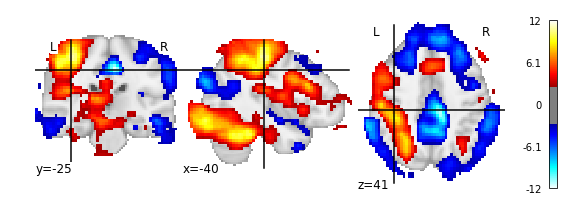

In [6]:
# Calculate a t-map (and visualizes it) --> WH warning is slow (needs a progress bar)
#from scipy import stats
FORMULA='fmri ~ cue + dprime'
CONTRAST = 'C_OLD_T_OLD_O_HI_gt_F'

n_subjects = image_data[0,0,0,:].shape[0]
vector = np.reshape(image_data,(np.product(image_data.shape[0:3]),n_subjects),order='F')

data = p


temp = stats.ttest_1samp(vector[0,:],0)
t = temp.statistic
p = temp.pvalue


names = pd.Series.keys(model.tvalues)
names = [name.replace('[','_').replace('.','_').replace(']','') for name in names]  #WH replace characters in list of names
residual = model.mse_resid
tvalues = model.tvalues


for ii in range(1, np.product(image_data.shape[0:3])):  #53*63*54 = 180306 = np.product(image_data.shape[0:3])
    temp = stats.ttest_1samp(vector[ii,:],0)
    t = np.append(t,temp.statistic)
    #p = np.append(p,temp.pvalue)
    
tmap = np.reshape(t,(53,63,54),order='F')
#pmap = np.reshape(p,(53,63,54),order='F')
img = nib.load(os.getcwd() + '/' + fn[0])
new_tmap = nib.Nifti1Image(tmap, img.affine, img.header)
#new_pmap = nib.Nifti1Image(pmap, img.affine, img.header)
#nib.save(new_img, 'test.nii')
print('Tmap for contrast: ' + fn[0][5:len(fn[0])-4]) #show contrast name based on first subject
plotting.plot_stat_map(new_tmap,threshold='auto')
plotting.show()

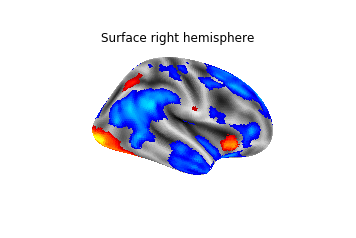

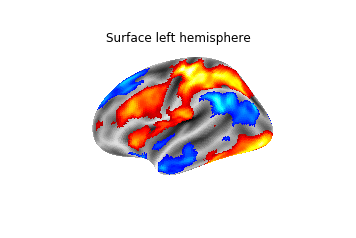

In [9]:
# Plot t-map to surface rendering (from fsaverage)
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage5()
new_tmap = nib.Nifti1Image(np.nan_to_num(tmap), img.affine, img.header)
from nilearn import surface

texture = surface.vol_to_surf(new_tmap, fsaverage.pial_right)
plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere',
                            threshold=3.0, bg_map=fsaverage.sulc_right,
                            cmap='cold_hot')

texture = surface.vol_to_surf(new_tmap, fsaverage.pial_left)
plotting.plot_surf_stat_map(fsaverage.infl_left, texture, hemi='left',
                            title='Surface left hemisphere',
                            threshold=3.0, bg_map=fsaverage.sulc_left,
                            cmap='cold_hot')
plotting.show()